In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
train_p = pd.read_csv('../data/train.csv')
train = np.array(train_p)
Y = train[:, train.shape[1]-1]
X = train[:,:80]

In [39]:
train_p.select_dtypes(['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
plt.plot( train_p['GrLivArea'], train_p['SalePrice'], 'o')
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('General Living Area', fontsize=13)
plt.show()

In [ ]:
plt.plot( train_p['GarageArea'], train_p['SalePrice'], 'o')
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('Garage Area', fontsize=13)
plt.show()

In [ ]:
plt.plot( train_p['YearBuilt'], train_p['SalePrice'], 'o')
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('Year Built', fontsize=13)
plt.show()

In [ ]:
#correlation matrix
corrmat = train_p.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
sns.distplot(np.log1p(train_p['SalePrice']))


In [ ]:
sns.distplot(np.log1p(train_p['SalePrice']));

In [ ]:
all_data_na = (train_p.isnull().sum() / len(train_p)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Feature', fontsize=17)
plt.ylabel('% Missing instances', fontsize=17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190061C70C8>,
      dtype=object)

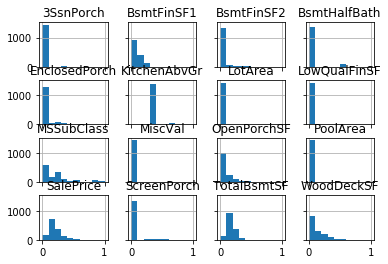

In [59]:
# skewed features show
from scipy.stats import skew 
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
skew_features = train_p.select_dtypes(numeric_dtypes).apply(
        lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
normalized_numerics = (train_p.select_dtypes(numeric_dtypes) - train_p.select_dtypes(numeric_dtypes).min()) / (train_p.select_dtypes(numeric_dtypes).max() - train_p.select_dtypes(numeric_dtypes).min())
normalized_numerics
normalized_numerics[high_skew.index[0:16]].hist(sharey=True, sharex=True)



In [49]:
train_p[high_skew.index[0:16]]

'WoodDeckSF'